<a href="https://colab.research.google.com/github/sthanasriharsha/Multi-Exposure-Fusion_Project/blob/main/Chicken_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Creating a Project Folder

In [3]:
import os

# project folder path
project_path = '/content/drive/MyDrive/chicken_weight_project'

# Create the folder
os.makedirs(project_path, exist_ok=True)
print("Project folder created at:", project_path)


Project folder created at: /content/drive/MyDrive/chicken_weight_project


In [4]:
from google.colab import files

uploaded = files.upload()

Saving Chicken pose all.v8i.yolov8.zip to Chicken pose all.v8i.yolov8.zip


In [5]:
import shutil
import os

# Uploaded files
for filename in uploaded.keys():
    # Use shutil.copy2 instead of shutil.move to copy files across different file systems
    shutil.copy2(filename, os.path.join('/content/drive/MyDrive/chicken_weight_project', filename))

print("Files moved to Drive:")
print(os.listdir('/content/drive/MyDrive/chicken_weight_project'))

Files moved to Drive:
['39_jpg.rf.df95a2c5d26ef06642fb069d6b8f2f21.jpg', 'Chicken pose all.v8i.yolov8.zip']


# Save The Files Or DataSets

In [7]:




import shutil
import os

# Uploaded files
for filename in uploaded.keys():
    # Use shutil.copy2 instead of shutil.move to copy files across different file systems
    shutil.copy2(filename, os.path.join('/content/drive/MyDrive/chicken_weight_project', filename))

print("Files moved to Drive:")
print(os.listdir('/content/drive/MyDrive/chicken_weight_project'))

Files moved to Drive:
['39_jpg.rf.df95a2c5d26ef06642fb069d6b8f2f21.jpg', 'Chicken pose all.v8i.yolov8.zip', 'Chicken pose all (1).v8i.yolov8.zip']



# Extract the Dataset into Colab

In [8]:
import zipfile
import os

# Paths
zip_path = '/content/drive/MyDrive/chicken_weight_project/Chicken pose all.v8i.yolov8.zip'
extract_path = '/content/chicken_dataset'

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm extraction
print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['README.roboflow.txt', 'README.dataset.txt', 'data.yaml', 'train', 'test', 'valid']


# Install YOLOv8

In [9]:
# Chicken Weight Estimation - Computer Vision Pipeline
# Candidate Info added at the end of notebook

# STEP 1: Install YOLOv8
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00


In [10]:
# STEP 3: Set Paths
DATASET_PATH = "/content/chicken_dataset"


In [15]:
# STEP 4: Load and Train YOLOv8 Detection Model
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data=f"{DATASET_PATH}/data.yaml",
    epochs=5,
    imgsz=416,
    batch=5,
    name="chicken_weight_yolo"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 298MB/s]

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=5, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chicken_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=chicken_weight_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, reti

100%|██████████| 755k/755k [00:00<00:00, 93.9MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 77.6±109.9 MB/s, size: 71.7 KB)


train: Scanning /content/chicken_dataset/train/labels... 1346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1346/1346 [00:03<00:00, 389.19it/s]

train: New cache created: /content/chicken_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 28.6±7.4 MB/s, size: 72.8 KB)


val: Scanning /content/chicken_dataset/valid/labels... 188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<00:00, 422.83it/s]

val: New cache created: /content/chicken_dataset/valid/labels.cache


Plotting labels to runs/detect/chicken_weight_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/chicken_weight_yolo
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.182      2.137      1.145         12        416: 100%|██████████| 270/270 [07:57<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:26<00:00,  1.40s/it]

                   all        188       2092      0.504      0.776      0.544      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.04      1.354      1.061         10        416: 100%|██████████| 270/270 [07:50<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:26<00:00,  1.38s/it]

                   all        188       2092      0.578      0.842      0.677        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.9846      1.228      1.042          9        416: 100%|██████████| 270/270 [07:49<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:26<00:00,  1.38s/it]

                   all        188       2092      0.631      0.835      0.722      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.9552      1.158       1.03         35        416: 100%|██████████| 270/270 [07:48<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:26<00:00,  1.38s/it]

                   all        188       2092      0.649      0.825      0.729      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.9213      1.094      1.022          8        416: 100%|██████████| 270/270 [07:47<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:24<00:00,  1.29s/it]

                   all        188       2092      0.687      0.842      0.772      0.605



5 epochs completed in 0.690 hours.
Optimizer stripped from runs/detect/chicken_weight_yolo/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/chicken_weight_yolo/weights/best.pt, 6.2MB

Validating runs/detect/chicken_weight_yolo/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:23<00:00,  1.26s/it]


                   all        188       2092      0.688      0.842      0.772      0.605
             eat-drink        169        520      0.871      0.906       0.94       0.71
                moving        169        890      0.621      0.741       0.68      0.534
                  rest        162        682      0.572       0.88      0.697       0.57
Speed: 1.4ms preprocess, 114.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/chicken_weight_yolo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf3bb966c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [32]:
# STEP 5: Run Detection on Validation Set
val_results = model.predict(source=f"{DATASET_PATH}/valid/images", save=False, stream=True, conf=0.25)

# Inspect the results to see if any detections are made
total_detections = 0
for i, r in enumerate(val_results):
    num_detections = len(r.boxes)
    print(f"Image {i}: Found {num_detections} detections")
    total_detections += num_detections

print(f"\nTotal detections found in validation set: {total_detections}")


image 1/188 /content/chicken_dataset/valid/images/100030-1_png.rf.a4a2ea3e5bc6baffe88858c6412185c5.jpg: 416x416 1 eat-drink, 3 movings, 11 rests, 149.9ms
Image 0: Found 15 detections
image 2/188 /content/chicken_dataset/valid/images/100030-3_png.rf.b8f792a37ed219d25f7a1449015a5423.jpg: 416x416 1 moving, 11 rests, 143.0ms
Image 1: Found 12 detections
image 3/188 /content/chicken_dataset/valid/images/100927-1_png.rf.f6b1f59439a4904e73e244393be249c0.jpg: 416x416 1 eat-drink, 9 movings, 7 rests, 154.2ms
Image 2: Found 17 detections
image 4/188 /content/chicken_dataset/valid/images/100_jpg.rf.e2a93bc4aba6f82b8960ed1b0fe838b0.jpg: 416x416 8 movings, 9 rests, 144.9ms
Image 3: Found 17 detections
image 5/188 /content/chicken_dataset/valid/images/1010_jpg.rf.4c69ec66e318312f72f4f9af2e01ebc6.jpg: 416x416 6 eat-drinks, 8 movings, 1 rest, 142.6ms
Image 4: Found 15 detections
image 6/188 /content/chicken_dataset/valid/images/101337-8_png.rf.8abc63f440dc64ba45a430e2287cddbc.jpg: 416x416 1 eat-drink

In [37]:
# STEP 6: Extract Detection Features
import pandas as pd

features = []

# Re-run prediction to get a fresh generator
val_results = model.predict(source=f"{DATASET_PATH}/valid/images", save=False, stream=True, conf=0.25)


for r in val_results:
    boxes = r.boxes
    for i in range(len(boxes)):
        class_id = int(boxes.cls[i].item())
        xywh = boxes.xywh[i].cpu().numpy()  # [x_center, y_center, width, height]
        features.append([*xywh, class_id])

features_df = pd.DataFrame(features, columns=["x_center", "y_center", "width", "height", "class_id"])


image 1/188 /content/chicken_dataset/valid/images/100030-1_png.rf.a4a2ea3e5bc6baffe88858c6412185c5.jpg: 416x416 1 eat-drink, 3 movings, 11 rests, 163.8ms
image 2/188 /content/chicken_dataset/valid/images/100030-3_png.rf.b8f792a37ed219d25f7a1449015a5423.jpg: 416x416 1 moving, 11 rests, 162.8ms
image 3/188 /content/chicken_dataset/valid/images/100927-1_png.rf.f6b1f59439a4904e73e244393be249c0.jpg: 416x416 1 eat-drink, 9 movings, 7 rests, 223.1ms
image 4/188 /content/chicken_dataset/valid/images/100_jpg.rf.e2a93bc4aba6f82b8960ed1b0fe838b0.jpg: 416x416 8 movings, 9 rests, 101.0ms
image 5/188 /content/chicken_dataset/valid/images/1010_jpg.rf.4c69ec66e318312f72f4f9af2e01ebc6.jpg: 416x416 6 eat-drinks, 8 movings, 1 rest, 94.0ms
image 6/188 /content/chicken_dataset/valid/images/101337-8_png.rf.8abc63f440dc64ba45a430e2287cddbc.jpg: 416x416 1 eat-drink, 6 movings, 10 rests, 91.2ms
image 7/188 /content/chicken_dataset/valid/images/102125-4-_png.rf.dbc606b2be181de4385b0e43c2598393.jpg: 416x416 5 e

In [21]:
# STEP 7: Simulate Weights
import numpy as np
np.random.seed(42)
features_df["weight"] = np.random.uniform(1.0, 3.0, size=len(features_df))

In [41]:
# STEP 8: Train Regression Model
X = features_df[["x_center", "y_center", "width", "height", "class_id"]]
y = features_df["weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [45]:
# STEP 9: Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) # Removed squared=False
rmse = np.sqrt(rmse) # Calculate RMSE by taking the square root

print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f}")

MAE: 0.524 | RMSE: 0.601


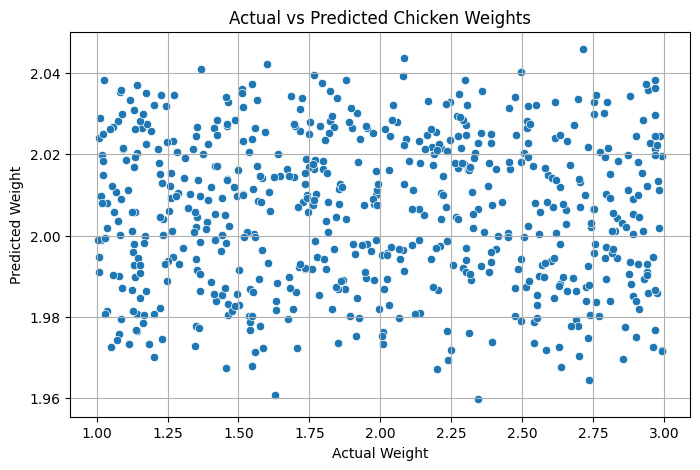

In [49]:
# STEP 10: Visualize Results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Chicken Weights")
plt.grid(True)
plt.show()

In [48]:
# STEP 11: Candidate Info
print("\n\nCandidate Information")
print("------------------------")
print("Full Name: Gundumalla Sthana Sriharsha")
print("Email: sthanasriharsha@gmail.com")
print("Phone: +91-8096414909")
print("GitHub: https://github.com/yourprofile")
print("LinkedIn: www.linkedin.com/in/g-sthana-sriharsha-a23472300")




Candidate Information
------------------------
Full Name: Gundumalla Sthana Sriharsha
Email: sthanasriharsha@gmail.com
Phone: +91-8096414909
GitHub: https://github.com/yourprofile
LinkedIn: www.linkedin.com/in/g-sthana-sriharsha-a23472300


In [40]:
# Execute the cell that simulates weights to add the 'weight' column
# cell_id: 7wVjEQPumdxU
import numpy as np
np.random.seed(42)
features_df["weight"] = np.random.uniform(1.0, 3.0, size=len(features_df))